# Introduction to pyROOT

**NOTE** - If you get an error about a "missing kernel". Close this notebook and run the `build_MLpyROOT_kernel` notebook in the same folder to create the required `MLpyROOT` kernel.

This exercise is intended to provide you with basic familiarity with pyROOT provides bindings for all classes within the ROOT libraries and allows for replacing the usual C++ with the often less cumbersome python. The goal is to obtain a general understanding of the syntax required to import and make use of the ROOT libraries within a basic python script. Various examples are provided in order to demonstrate TH1 histogram manipulation including; reading from a .root file, creating, binning, re-binning, scaling, plotting and fitting to a Gaussian.

Whether you use python or C++ to complete your analysis is a personal preference however with the current lack of documentation on pyROOT many students stick with C++ in order to ensure their access to coding examples and experts. It is our hope that through providing you with this basic introduction and Github repository of example scripts, which you are encouraged to add to, that we can bring together the existing pyROOT community within CMS and foster its growth.

## Machine Learning packages

In addition, this example shows how to use various Machine Learning packages installed in advance in an Anaconda environment.

## About Jupyter
Jupyter is a novel way to both execute and teach Python libraries. This `notebook` contains many `cells`, each of with contain snippets of executable Python code. You ran a cell earlier to create the `cmsdas-preexercise` kernel. Executions of cells within the same notebook happen within the same Python environment, so notebooks can be used to gradually and incrementally perform data analysis. Execute your first Python cell by clicking the following cell and pressing `Shift+Enter`

In [1]:
x = 2

This cell creates a new variable `x`. The next cell confirms that Python remembers the value you previously gave it. Jupyter puts the output for each cell directly after it, so you can see what code produced which output.

In [2]:
print (x)

2


# Our first pyROOT example
Let's examine what a typical pyROOT script will look like. As you read through the documentation, make sure to execute each cell in order.

All pyROOT scripts must install the ROOT libraries into the Python process. ROOT isn't a standard part of Python, so we load it from CMSSW via the kernel we installed. To load ROOT, execute the following cell

In [3]:
import ROOT

Welcome to JupyROOT 6.22/09


When you run this cell, you probably notice that the cell temporarily changed to look like the following 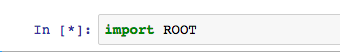 before finally changing to this. 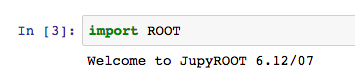

While a computation is occuring in the background, the status symbol for that line will change to `[*]`. Once the computation is complete, the status will change to `[3]`, where the number in the brackets is the execution counter. Each time a cell is executed, the counter is incremented to be one larger. This is helpful to keep track of the order cells were executed.

Now that ROOT is loaded, we will want to open our input and output files, and load a histogram from the input.

In [4]:
theInfile = ROOT.TFile("samples/infile.root","READ")
theOutfile = ROOT.TFile("outfile.root","RECREATE")
theHist = theInfile.Get("AK8MHist16")

If you're familiar with ROOT, you'll notice that this syntax is very similar to the C++ ROOT syntax. In fact, the pyROOT commands have a one-to-one correspondance to the C++ versions (with few exceptions). 



One great advantage to Jupyter is that plots can be displayed directly in the browser, without any additional steps or complicated configuration. Any `TCanvas` that is written to will be showed immediately after the code that produced it. Execute the following cell to see an example Jet Mass plot.

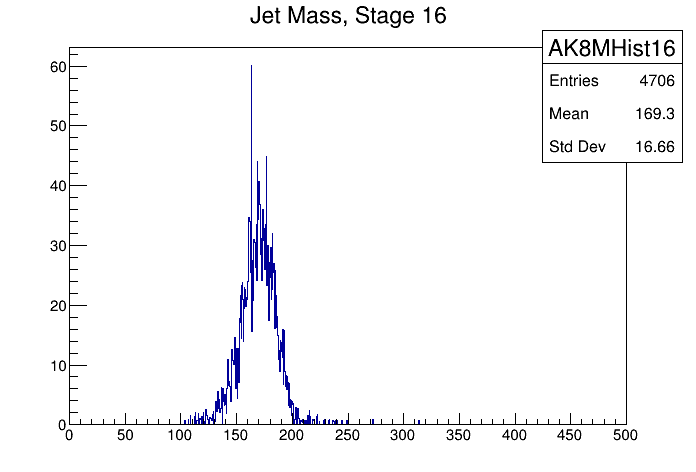

In [5]:
ROOT.gStyle.SetOptFit(1111)
theCanvas = ROOT.TCanvas('theCanvas','')
theHist.Draw('hist')
theCanvas.Update()
theCanvas.Draw()

Finally, like the C++ version, we need to write and close any open objects and files. The following cell implements this.

In [6]:
theHist.Write()
theCanvas.Write()

theOutfile.cd()
theOutfile.Write()
theOutfile.Close()

Great! We just looked at a very simple pyROOT example. Let's see a more complicated example which builds on the first but also illustrates some commonly used histogram manipulations such as; creating, binning, re-binning, scaling, fitting to a Gaussian and saving to various file types.

# pyROOT Example Two
Like before, we'll want to load our input file and histogram. The `sumw2()` call tells ROOT to properly propagate the $w^2$ for each histogram, which causes the errors to be produced properly.

In [7]:
theInfile = ROOT.TFile("samples/infile.root","READ")

histName = "AK8MPt400To500Hist15"   
theHist = theInfile.Get(histName)
# Ensure proper error propogation
theHist.Sumw2()

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


The pyROOT library lets you call any function defined in ROOT. Compare these two calls with their documentation:
* `scale()` - [doc](https://root.cern.ch/doc/master/classTH1.html#add929909dcb3745f6a52e9ae0860bfbd)
* `rebin()` - [doc](https://root.cern.ch/doc/master/classTH1.html#aff6520fdae026334bf34fa1800946790)

In [8]:
# Scale the histogram vertically -- this is useful for things like
# scaling a Monte Carlo sample to match the theorertical predictions
theHist.Scale(100)

# Change the number of bins from the value the histogram was initialized with
theHist.Rebin(10)

Once you run the cell, you should notice the following output

This is a convenience method to preent you from having to explicitly print the values. Jupyter will print the value of the last line in the cell

Next we will want to fit a function to our data. In this case, we will use a regular Gaussian distribution, but other distributions (e.g. Poisson) are also available. In ROOT, we do this via a [TF1](https://root.cern.ch/doc/master/classTF1.html) object. We can call the C++ functions described in the docs via pyROOT.

In [9]:
# Fitting the histogram to a Gaussian
theFitFunc = ROOT.TF1("theFitFunc", "gaus", 110, 210)
theFitFunc.SetLineColor(1)
theFitFunc.SetLineWidth(2)
theFitFunc.SetLineStyle(2)
# Perform the fit with our histogram we extracted from simulation
theHist.Fit(theFitFunc,'S')

 FCN=115.943 FROM MIGRAD    STATUS=CONVERGED      80 CALLS          81 TOTAL
                     EDM=2.09373e-11    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.6 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.20049e+04   7.28025e+02   2.68626e-01  -8.49531e-09
   2  Mean         1.54766e+02   5.24661e-01   1.68278e-04  -9.74366e-06
   3  Sigma        1.40915e+01   3.26103e-01  -6.03026e-06  -1.32145e-04


Once the fit is performed, ROOT provides the values of your chosen equation. Since this is a gaussian, the equation is in the form of

$ y = \frac{c}{\sqrt{2 \pi \sigma^2}} e^{ - \frac{(x - \mu)^2}{2 \sigma} } $

where $ \sigma $ is the sigma (or width), $ \mu $ is the mean (or peak) value, and c is a scaling constant. The parameters output above are the parameters that cause the gaussian to best fit the data.

Let's now plot our data distribution

In [10]:
ROOT.gStyle.SetOptFit(1111)
c = ROOT.TCanvas('c-' + histName,'')

theHist.Draw('hist')

To overlay the fit over the data, we do `Draw()` again, but with the `same` parameter. This tells ROOT to draw on top of the old plot, without clearing it first.

In [11]:
theFitFunc.Draw("same")

Before we plot, we want to make sure to change the axes to be sensible values

In [12]:
# Set the maximum value for the y axis
max_y = theHist.GetMaximum() 
theHist.SetMaximum(max_y * 1.2)
theHist.GetXaxis().SetRangeUser(80 , 250)

Finally, let's show the result

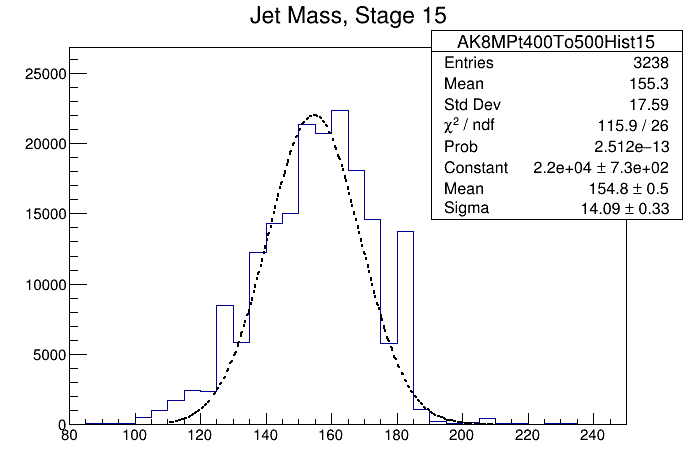

In [13]:
c.Update()
c.Draw()

Note that ROOT helpfully puts the fit parameters in the legend.

When using pyROOT in Jupyter, plots are displayed inline, but it's sometimes useful to output plots to files. The following two lines will output this plot in both PDF and PNG formats.

In [14]:
c.Print('plots/'+ histName + '_' + 'GaussianFit.png', 'png' )
c.Print('plots/'+ histName + '_' + 'GaussianFit.pdf', 'pdf' )

Info in <TCanvas::Print>: png file plots/AK8MPt400To500Hist15_GaussianFit.png has been created
Info in <TCanvas::Print>: pdf file plots/AK8MPt400To500Hist15_GaussianFit.pdf has been created


Finally, it's good practice to close any open files once the script is done. In particular, if any objects were made, it's good to explicitly close (and write) files. This can help prevent file corruption

In [15]:
theInfile.Close()

Test Keras, TensorFlow, numpy with the example in:
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [16]:
import numpy as np
import tensorflow as tf
import keras as k

In [17]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [19]:
# load the dataset
dataset = loadtxt('samples/pima-indians-diabetes.data.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

In [20]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

2021-10-22 18:39:34.142963: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 1s 610us/step - loss: 7.8154 - accuracy: 0.3971
Epoch 2/150
77/77 [==============================] - 0s 558us/step - loss: 1.3697 - accuracy: 0.5234
Epoch 3/150
77/77 [==============================] - 0s 547us/step - loss: 0.9223 - accuracy: 0.5469
Epoch 4/150
77/77 [==============================] - 0s 541us/step - loss: 0.8439 - accuracy: 0.5482
Epoch 5/150
77/77 [==============================] - 0s 538us/step - loss: 0.7806 - accuracy: 0.5729
Epoch 6/150
77/77 [==============================] - 0s 539us/step - loss: 0.7540 - accuracy: 0.5729
Epoch 7/150
77/77 [==============================] - 0s 536us/step - loss: 0.7313 - accuracy: 0.5885
Epoch 8/150
77/77 [==============================] - 0s 534us/step - loss: 0.7047 - accuracy: 0.6133
Epoch 9/150
77/77 [==============================] - 0s 548us/step - loss: 0.6846 - accuracy: 0.6263
Epoch 10/150
77/77 [==============================] - 0s 533us/step - loss: 0.6705 - accura

77/77 [==============================] - 0s 518us/step - loss: 0.5076 - accuracy: 0.7526
Epoch 82/150
77/77 [==============================] - 0s 523us/step - loss: 0.5147 - accuracy: 0.7604
Epoch 83/150
77/77 [==============================] - 0s 516us/step - loss: 0.5068 - accuracy: 0.7669
Epoch 84/150
77/77 [==============================] - 0s 521us/step - loss: 0.5164 - accuracy: 0.7461
Epoch 85/150
77/77 [==============================] - 0s 519us/step - loss: 0.5095 - accuracy: 0.7552
Epoch 86/150
77/77 [==============================] - 0s 512us/step - loss: 0.5080 - accuracy: 0.7539
Epoch 87/150
77/77 [==============================] - 0s 526us/step - loss: 0.5159 - accuracy: 0.7578
Epoch 88/150
77/77 [==============================] - 0s 530us/step - loss: 0.5060 - accuracy: 0.7526
Epoch 89/150
77/77 [==============================] - 0s 521us/step - loss: 0.5051 - accuracy: 0.7422
Epoch 90/150
77/77 [==============================] - 0s 528us/step - loss: 0.5079 - accuracy: 

2021-10-22 18:40:40.378017: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-22 18:40:40.378928: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1996340000 Hz


In [23]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 485us/step - loss: 0.4663 - accuracy: 0.7943
Accuracy: 79.43


In [26]:
# make probability predictions with the model
predictions = model.predict(X)
# round predictions 
rounded = [round(x[0]) for x in predictions]
# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)


## Conclusion
This example briefly introduces the concepts of setting up custom Jupyter kernels for Machine Learning in the CMSSW environment, allowing the use of pyROOT too. 